In [33]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [34]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam

In [35]:
# load dataset
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [36]:
train_X.shape

(60000, 28, 28)

In [37]:

# reshape dataset to have a single channel
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

# one hot encode target values
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [38]:
train_X.shape

(60000, 28, 28, 1)

In [39]:
# create model
model = Sequential()

# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [40]:
# compile the model using Adam optimizer
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# train the model
history=model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10, batch_size=300)

Epoch 1/10
200/200 [==============================] - 9s 44ms/step - loss: 1.5066 - accuracy: 0.7119 - val_loss: 0.6040 - val_accuracy: 0.7983
Epoch 2/10
200/200 [==============================] - 9s 43ms/step - loss: 0.5001 - accuracy: 0.8245 - val_loss: 0.4999 - val_accuracy: 0.8238
Epoch 3/10
200/200 [==============================] - 9s 43ms/step - loss: 0.4270 - accuracy: 0.8483 - val_loss: 0.4497 - val_accuracy: 0.8436
Epoch 4/10
200/200 [==============================] - 9s 43ms/step - loss: 0.3834 - accuracy: 0.8635 - val_loss: 0.4094 - val_accuracy: 0.8545
Epoch 5/10
200/200 [==============================] - 9s 43ms/step - loss: 0.3503 - accuracy: 0.8741 - val_loss: 0.3918 - val_accuracy: 0.8612
Epoch 6/10
200/200 [==============================] - 9s 43ms/step - loss: 0.3285 - accuracy: 0.8835 - val_loss: 0.3849 - val_accuracy: 0.8673
Epoch 7/10
200/200 [==============================] - 9s 43ms/step - loss: 0.3148 - accuracy: 0.8863 - val_loss: 0.3655 - val_accuracy: 0.8745

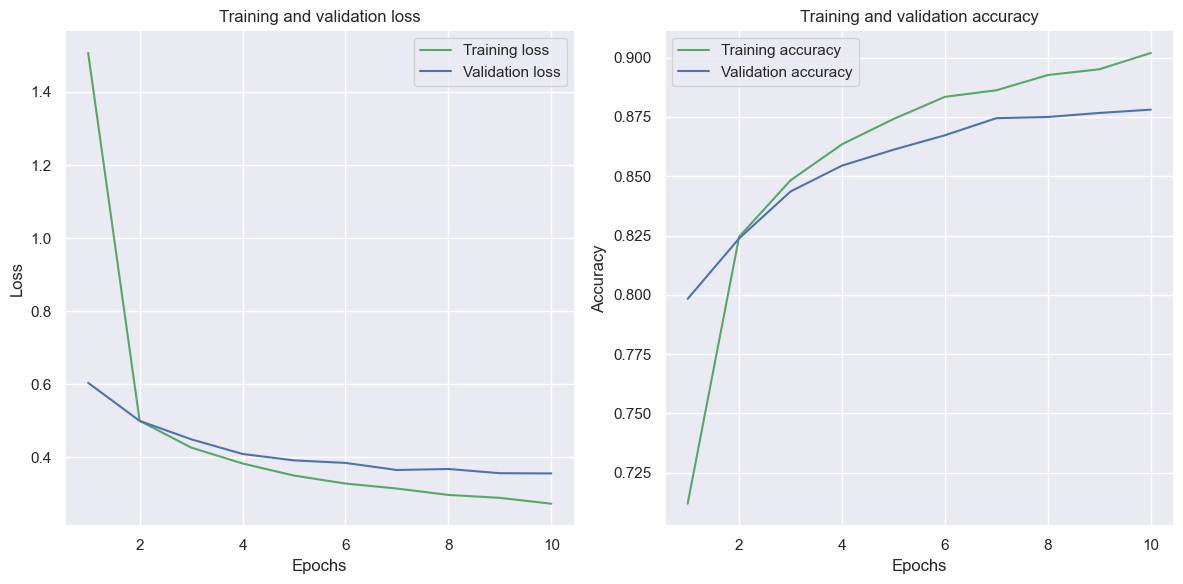

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# "History" object keeps the history of loss and metric values in history.history:
history_dict = history.history

# Plot Training and validation loss:

loss_values = history_dict['loss']  # Loss values for training
val_loss_values = history_dict['val_loss'] # Loss values for validation
epochs = range(1, len(loss_values) + 1) # X-axis values

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and validation accuracy:

acc_values = history_dict['accuracy']  # accuracy values for training
val_acc_values = history_dict['val_accuracy'] # accuracy values for validation

plt.subplot(1,2,2)
plt.plot(epochs, acc_values, 'g', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
# evaluate the model
loss, accuracy = model.evaluate(test_X, test_y)
print('Test accuracy: %.2f' % accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8781
Test accuracy: 0.88


In [44]:
model.save(
    "./model/cnn_model.h5")

In [45]:
model.save_weights('./model/cnn_model_weights.h5')

### Conclusion

Хотя архитектура, выбранная для этой сети, а также настройки обучения довольно просты и не могут привести к высокой точности, тем не менее, сравнивая точность последнего решения с многоуровневой сетью из предыдущей задачи (Test Accuracy: 0.84), является очевидным, что convolutional neural network лучше справляется с задачами классификации изображений, поскольку она может учитывать пространственные корреляции между пикселями, тогда как простая многослойная сеть обрабатывает каждый пиксель независимо.